## Importing required Libraries

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [22]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [23]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [24]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


# Required Preprocessing 

In [28]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [29]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

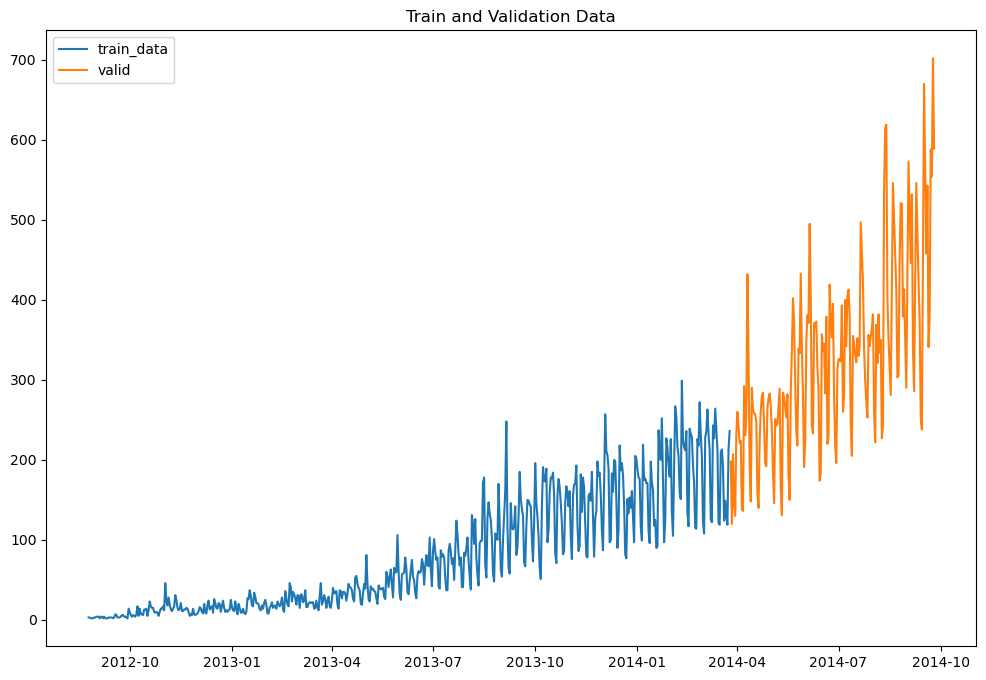

In [30]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

## Time Series Decomposition

<Figure size 2000x1500 with 0 Axes>

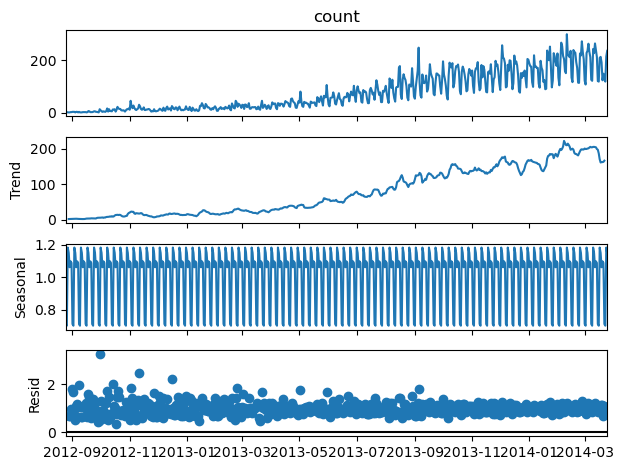

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(train_data['count'], model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(20,15))
result.plot()
plt.show()

In [32]:
RMSE_df = pd.DataFrame([0]*5, index= ['naive', 'average_complete', 'average_lastweek',\
                                      'moving_average', 'weighted_moving_average'], columns=["RMSE"])
RMSE_df 

,RMSE
naive,0
average_complete,0
average_lastweek,0
moving_average,0
weighted_moving_average,0


# Naive Model
Use the last (most recent) value of train as the predictions

In [33]:
print(train_data.shape)
train_data.tail()

(578, 2)


,Date,count
Date,,
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [34]:
# indexing starts from 0
train_data['count'][-1]  # last value in the training data

236

In [35]:
# Defining predictions for validation
valid_data['naive'] = train_data['count'][-1] 

In [36]:
valid_data.head()

,Date,count,naive
Date,,,
2014-03-26,2014-03-26,198,236
2014-03-27,2014-03-27,120,236
2014-03-28,2014-03-28,207,236
2014-03-29,2014-03-29,145,236
2014-03-30,2014-03-30,130,236


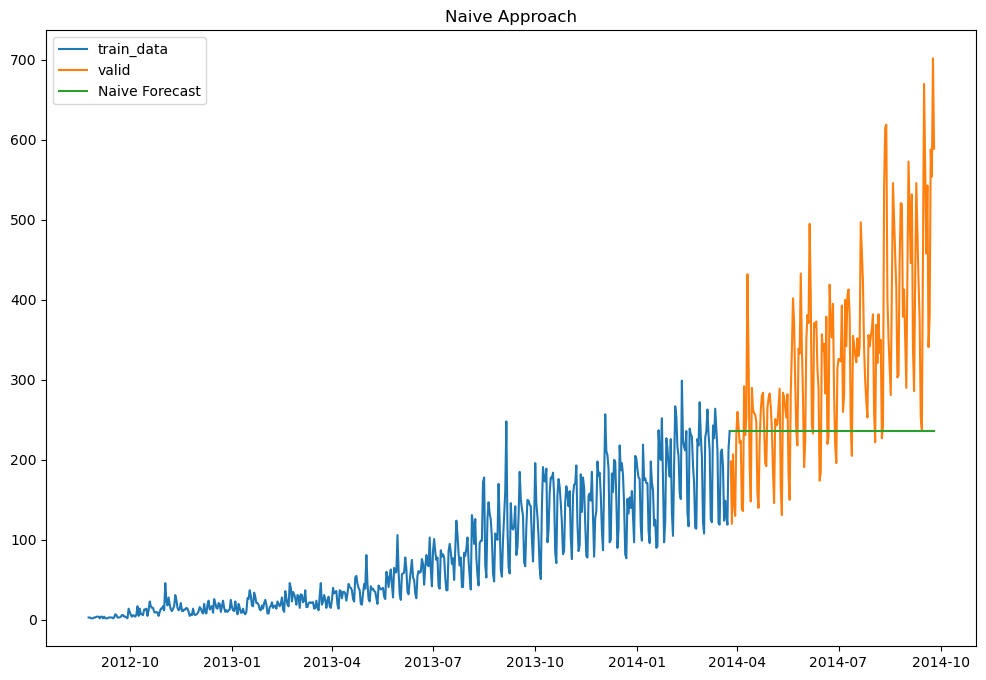

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Approach")
plt.show()

In [39]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['naive']))
print('The RMSE value for Naive Approach is', rmse)

The RMSE value for Naive Approach is 146.95130071764828


In [40]:
RMSE_df.loc["naive"] = rmse
RMSE_df

,RMSE
naive,146.951301
average_complete,0.000000
average_lastweek,0.000000
moving_average,0.000000
weighted_moving_average,0.000000


# Simple Average

Taking average of the complete data

In [41]:
train_data['count'].mean()

78.18166089965398

In [42]:
# Defining predictions for validation
valid_data['average_complete'] = train_data['count'].mean()

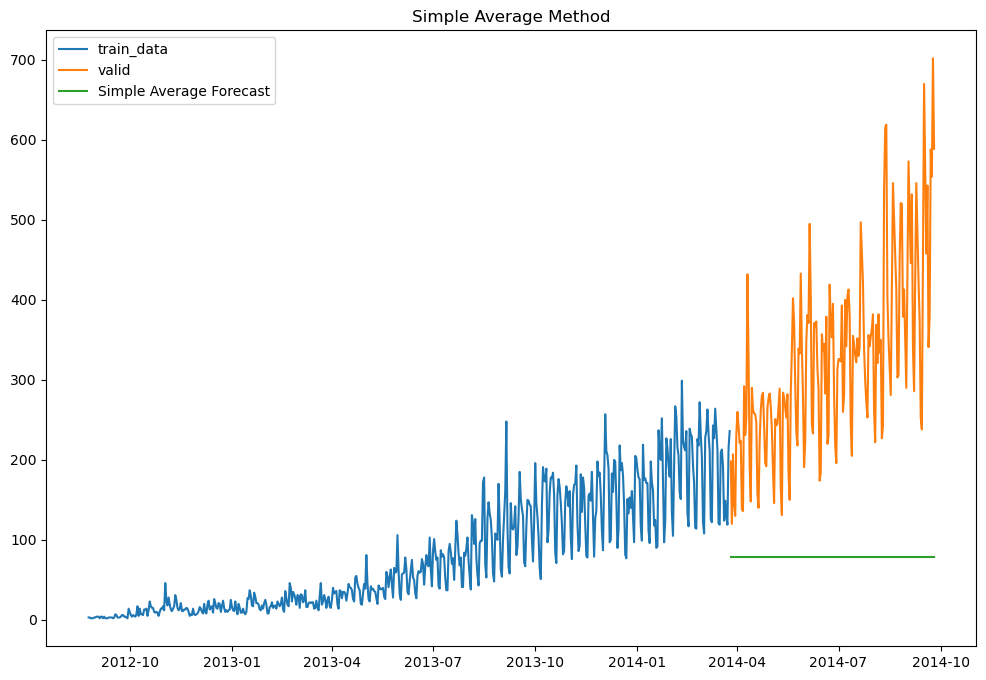

In [43]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_complete'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [44]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_complete']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 274.7203499275037


In [45]:
RMSE_df.loc["average_complete"] = rmse
RMSE_df

,RMSE
naive,146.951301
average_complete,274.720350
average_lastweek,0.000000
moving_average,0.000000
weighted_moving_average,0.000000


The initial values in the train data are smaller. Instead of taking the average of the complete data, we should take the average of only the recent values in order to make the predictions. 

In [46]:
train_data.tail(7)

,Date,count
Date,,
2014-03-19,2014-03-19,192
2014-03-20,2014-03-20,124
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [47]:
train_data.shape

(578, 2)

In [48]:
temp = (train_data['count'][-7:]).values
print('Lask week values are:', temp)
print('Average for last week is', temp.mean())

Lask week values are: [192 124 149 129 119 214 236]
Average for last week is 166.14285714285714


In [49]:
valid_data.head()

,Date,count,naive,average_complete
Date,,,,
2014-03-26,2014-03-26,198,236,78.181661
2014-03-27,2014-03-27,120,236,78.181661
2014-03-28,2014-03-28,207,236,78.181661
2014-03-29,2014-03-29,145,236,78.181661
2014-03-30,2014-03-30,130,236,78.181661


In [50]:
# Defining predictions for validation
valid_data['average_lastweek'] = temp.mean()

In [51]:
valid_data.head()

,Date,count,naive,average_complete,average_lastweek
Date,,,,,
2014-03-26,2014-03-26,198,236,78.181661,166.142857
2014-03-27,2014-03-27,120,236,78.181661,166.142857
2014-03-28,2014-03-28,207,236,78.181661,166.142857
2014-03-29,2014-03-29,145,236,78.181661,166.142857
2014-03-30,2014-03-30,130,236,78.181661,166.142857


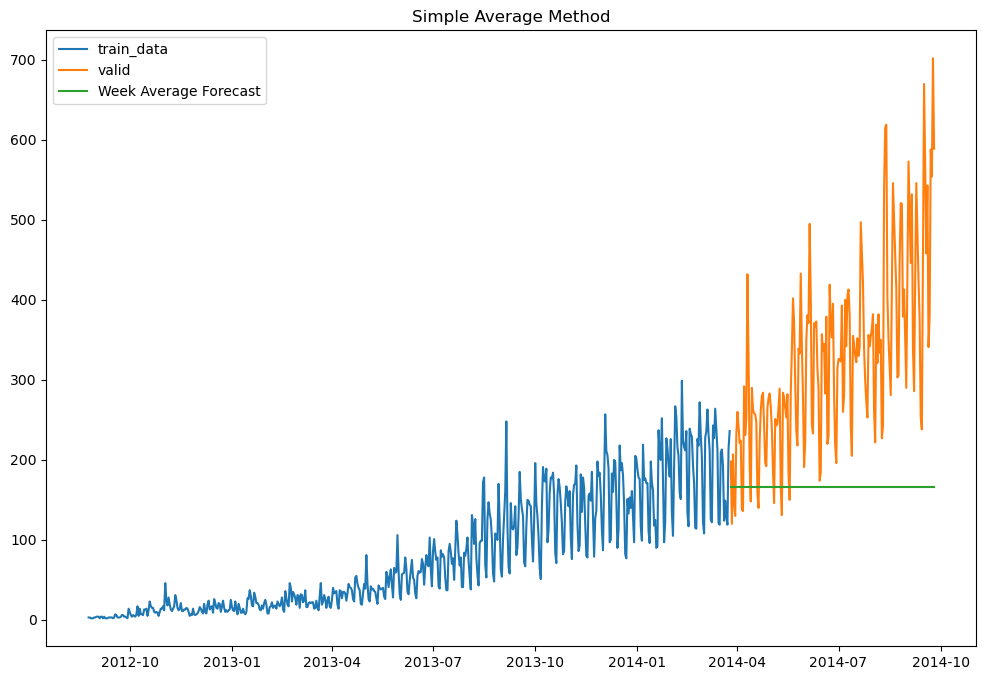

In [52]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_lastweek'], label='Week Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [53]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_lastweek']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 198.23734967376558


In [54]:
RMSE_df.loc["average_lastweek"] = rmse
RMSE_df

,RMSE
naive,146.951301
average_complete,274.720350
average_lastweek,198.237350
moving_average,0.000000
weighted_moving_average,0.000000


This is better than the last method. Here, instead of 7 days, you can take last 14 days, or 20 days and see which gives you more accurate results. Try it out at your end.

# Moving Average

We have a straight line here because same average value is predicted for all future points. We can change the 'last 7 days' value for each data point.

In [56]:
train_data.tail(7)

,Date,count
Date,,
2014-03-19,2014-03-19,192
2014-03-20,2014-03-20,124
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [57]:
# list holding last seven values

valid_data['moving_average'] = 0
valid_data.tail()

,Date,count,naive,average_complete,average_lastweek,moving_average
Date,,,,,,
2014-09-21,2014-09-21,379,236,78.181661,166.142857,0
2014-09-22,2014-09-22,588,236,78.181661,166.142857,0
2014-09-23,2014-09-23,554,236,78.181661,166.142857,0
2014-09-24,2014-09-24,702,236,78.181661,166.142857,0
2014-09-25,2014-09-25,589,236,78.181661,166.142857,0


In [58]:
temp  # last 7 values in the train set

array([192, 124, 149, 129, 119, 214, 236], dtype=int64)

In [59]:
week_values = list(temp)
# [192, 124, 149, 129, 119, 214, 236]

In [61]:
for i in range(0,len(valid_data)):
    end = len(week_values)
    start = len(week_values)-7
    pred = mean(week_values[start:end])
    
    valid_data['moving_average'][i] = pred
    week_values.append(pred)

In [62]:
week_values

[192,
 124,
 149,
 129,
 119,
 214,
 236,
 166,
 162,
 167,
 170,
 176,
 184,
 180,
 172,
 173,
 174,
 175,
 176,
 176,
 175,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174

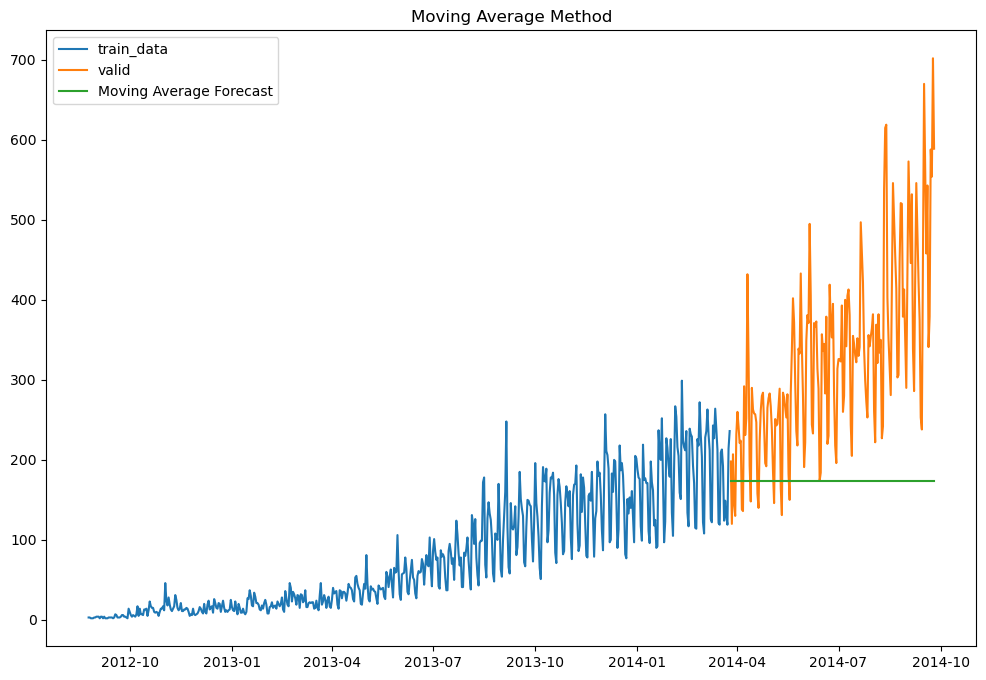

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['moving_average'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Method")
plt.show()

In [64]:
valid_data['moving_average'].head(25)

Date
2014-03-26    174
2014-03-27    174
2014-03-28    174
2014-03-29    174
2014-03-30    174
2014-03-31    174
2014-04-01    174
2014-04-02    174
2014-04-03    174
2014-04-04    174
2014-04-05    174
2014-04-06    174
2014-04-07    174
2014-04-08    174
2014-04-09    174
2014-04-10    174
2014-04-11    174
2014-04-12    174
2014-04-13    174
2014-04-14    174
2014-04-15    174
2014-04-16    174
2014-04-17    174
2014-04-18    174
2014-04-19    174
Name: moving_average, dtype: int64

In [65]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['moving_average']))
print('The RMSE value for Moving Approach is', rmse)

The RMSE value for Moving Approach is 191.88467437726644


In [66]:
RMSE_df.loc["moving_average"] = rmse
RMSE_df

,RMSE
naive,146.951301
average_complete,274.720350
average_lastweek,198.237350
moving_average,191.884674
weighted_moving_average,0.000000


# Weighted Moving Average
Move the window and assign weights to the values in this window. I am taking higher weights to recent observations. Weights can be assigned manually or using a function.

In [51]:
train_data['count'][-7:]

Date
2014-02-03    191
2014-02-04    267
2014-02-05    254
2014-02-06    216
2014-02-07    205
2014-02-08    159
2014-02-09    151
Name: count, dtype: int64

In [67]:
# list holding last seven values and weights

week_values = train_data['count'][-7:].values
week_values = week_values.tolist()

weights = []
for i in range(1,8):
    W = i/8
    weights.append(W)

In [68]:
len(week_values), len(weights)

(7, 7)

In [69]:
valid_data.head()

,Date,count,naive,average_complete,average_lastweek,moving_average
Date,,,,,,
2014-03-26,2014-03-26,198,236,78.181661,166.142857,174
2014-03-27,2014-03-27,120,236,78.181661,166.142857,174
2014-03-28,2014-03-28,207,236,78.181661,166.142857,174
2014-03-29,2014-03-29,145,236,78.181661,166.142857,174
2014-03-30,2014-03-30,130,236,78.181661,166.142857,174


In [70]:
valid_data['weighted_moving_average'] = 0
valid_data.head()

,Date,count,naive,average_complete,average_lastweek,moving_average,weighted_moving_average
Date,,,,,,,
2014-03-26,2014-03-26,198,236,78.181661,166.142857,174,0
2014-03-27,2014-03-27,120,236,78.181661,166.142857,174,0
2014-03-28,2014-03-28,207,236,78.181661,166.142857,174,0
2014-03-29,2014-03-29,145,236,78.181661,166.142857,174,0
2014-03-30,2014-03-30,130,236,78.181661,166.142857,174,0


In [71]:
for i in range(0,len(valid_data)):
    
    end = len(week_values)
    start = len(week_values)-7
    
    final_values = week_values[start:end]
    
    weighted_values = 0
    for j, k in zip(weights,final_values):
        weighted_values += j*k
        
    weighted_mean = weighted_values/sum(weights)
        
    valid_data['weighted_moving_average'][i] = weighted_mean
    week_values.append(weighted_mean)

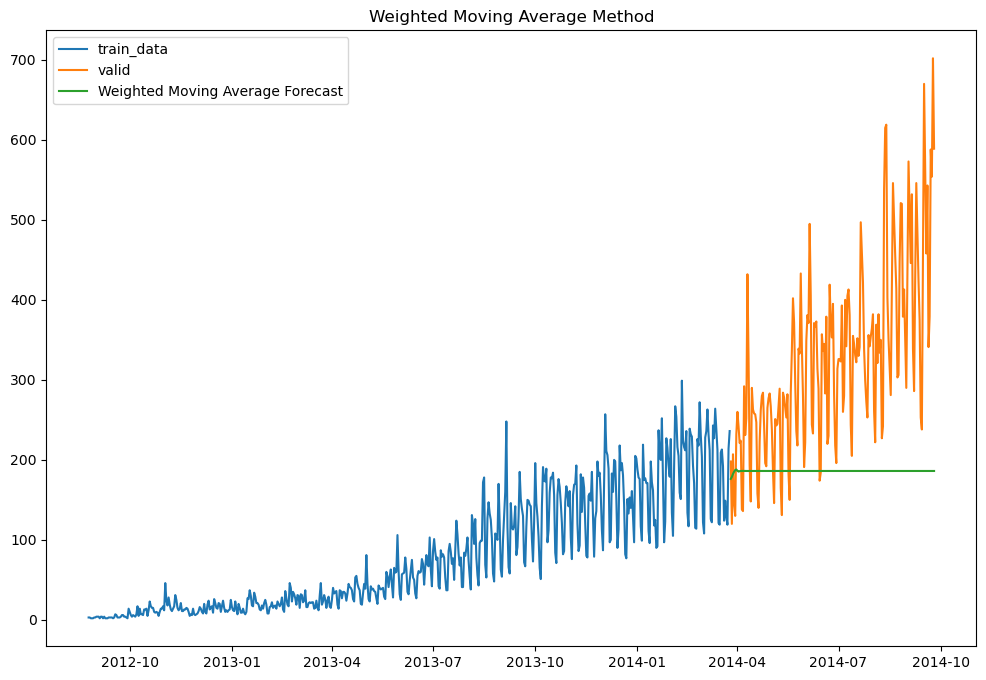

In [72]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['weighted_moving_average'], label='Weighted Moving Average Forecast')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [73]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['weighted_moving_average']))
print('The RMSE value for Weighted Moving Approach is', rmse)

The RMSE value for Weighted Moving Approach is 182.30007554355976


In [74]:
RMSE_df.loc["weighted_moving_average"] = rmse
RMSE_df.round(2)

,RMSE
naive,146.95
average_complete,274.72
average_lastweek,198.24
moving_average,191.88
weighted_moving_average,182.30


In [75]:
RMSE_df.round(2)

,RMSE
naive,146.95
average_complete,274.72
average_lastweek,198.24
moving_average,191.88
weighted_moving_average,182.30


In [76]:
valid_data.head()

,Date,count,naive,average_complete,average_lastweek,moving_average,weighted_moving_average
Date,,,,,,,
2014-03-26,2014-03-26,198,236,78.181661,166.142857,174,176.214286
2014-03-27,2014-03-27,120,236,78.181661,166.142857,174,178.732143
2014-03-28,2014-03-28,207,236,78.181661,166.142857,174,182.443240
2014-03-29,2014-03-29,145,236,78.181661,166.142857,174,185.127392
2014-03-30,2014-03-30,130,236,78.181661,166.142857,174,187.288180


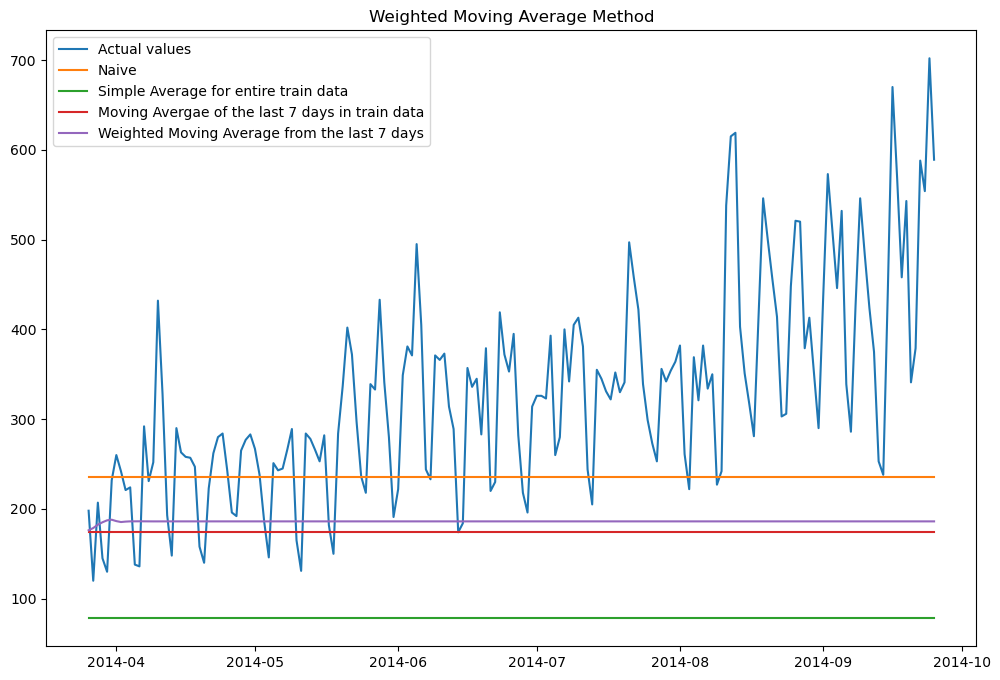

In [78]:
plt.figure(figsize=(12,8))

plt.plot(valid_data.index,valid_data['count'], label='Actual values')
plt.plot(valid_data.index,valid_data['naive'], label='Naive')
plt.plot(valid_data.index,valid_data['average_complete'], label='Simple Average for entire train data')
plt.plot(valid_data.index,valid_data['moving_average'], label='Moving Avergae of the last 7 days in train data')
plt.plot(valid_data.index,valid_data['weighted_moving_average'], label='Weighted Moving Average from the last 7 days')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [64]:
valid_data.columns 

Index(['Date', 'count', 'naive', 'average_complete', 'average_lastweek',
       'moving_average', 'weighted_moving_average'],
      dtype='object')